Primo approccio ad una correzione del dataset (date)

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
df = pd.read_csv('../../Dataset/training.csv') 

In [3]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,326,1,10/25/2010,ADESA,2008,2,KIA,SPECTRA,EX,4D SEDAN EX,...,9605.0,10650.0,NaN,NaN,5546,33619,FL,6100.0,0,533
1,42991,0,5/27/2009,MANHEIM,2006,3,DODGE,STRATUS V6 2.7L V6 M,SXT,4D SEDAN SXT FFV,...,6418.0,7478.0,NaN,NaN,99750,32124,FL,4000.0,0,1630
2,55273,0,3/18/2010,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,...,10721.0,11350.0,NaN,NaN,99761,74135,OK,7500.0,0,693
3,29058,0,6/8/2009,OTHER,2005,4,FORD,FREESTAR FWD V6 3.9L,S,PASSENGER 3.9L,...,5702.0,7691.0,NaN,NaN,99761,85018,AZ,4725.0,0,1633
4,34991,0,3/4/2009,MANHEIM,2005,4,CHRYSLER,TOWN & COUNTRY FWD V,Bas,MINIVAN 3.3L,...,6300.0,7856.0,NaN,NaN,20833,75236,TX,5670.0,0,1623


In [4]:
df.dtypes

RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrent

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 34 columns):
RefId                                58386 non-null int64
IsBadBuy                             58386 non-null int64
PurchDate                            58386 non-null object
Auction                              58386 non-null object
VehYear                              58386 non-null int64
VehicleAge                           58386 non-null int64
Make                                 58386 non-null object
Model                                58386 non-null object
Trim                                 56475 non-null object
SubModel                             58379 non-null object
Color                                58379 non-null object
Transmission                         58378 non-null object
WheelTypeID                          55813 non-null float64
WheelType                            55809 non-null object
VehOdo                               58386 non-null int64
Nationalit

In [6]:
df['PurchDate']

0        10/25/2010
1         5/27/2009
2         3/18/2010
3          6/8/2009
4          3/4/2009
            ...    
58381      3/9/2010
58382     1/26/2010
58383    10/28/2010
58384     12/1/2010
58385     10/8/2009
Name: PurchDate, Length: 58386, dtype: object

In [7]:
for i in range(0,10):
    findRegex='^'+str(i)+'/'
    substitute='0'+str(i)+'/'
    df['PurchDate']=df['PurchDate'].str.replace(findRegex,substitute)
    findRegex='/'+str(i)+'/'
    substitute='/0'+str(i)+'/'
    df['PurchDate']=df['PurchDate'].str.replace(findRegex,substitute)
    

In [8]:
df['PurchDate']

0        10/25/2010
1        05/27/2009
2        03/18/2010
3        06/08/2009
4        03/04/2009
            ...    
58381    03/09/2010
58382    01/26/2010
58383    10/28/2010
58384    12/01/2010
58385    10/08/2009
Name: PurchDate, Length: 58386, dtype: object

In [9]:
#conversione e check correttezza date
df['PurchDate']=pd.to_datetime(df['PurchDate'], dayfirst=True)

In [131]:
(df == 0).sum(axis=0)

RefId                                    0
IsBadBuy                             51178
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               1
Make                                     0
Model                                    0
Trim                                     0
SubModel                                 0
Color                                    0
Transmission                             0
WheelTypeID                              4
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice      648
MMRAcquisitionAuctionCleanPrice        552
MMRAcquisitionRetailAveragePrice       648
MMRAcquisitonRetailCleanPrice          648
MMRCurrentAuctionAveragePrice          393
MMRCurrentA

In [11]:
df.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1911
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2573
WheelType                             2577
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245
MMRCurrentA

In [55]:
counter=0;
for ID,PDate,VehYear,VehicleAge in zip(df['RefId'], df['PurchDate'], df['VehYear'], df['VehicleAge']):
    if(PDate.year-VehYear!=VehicleAge):
        print( df.loc[df['RefId']==ID, ['PurchDate','VehYear','VehicleAge']])
        counter=counter+1

       PurchDate  VehYear  VehicleAge
20050 2009-11-30     2005           5
       PurchDate  VehYear  VehicleAge
21277 2009-12-21     2005           5
       PurchDate  VehYear  VehicleAge
22979 2009-12-31     2006           4
       PurchDate  VehYear  VehicleAge
26365 2009-08-26     2003           7
       PurchDate  VehYear  VehicleAge
39989 2009-03-11     2006           4
       PurchDate  VehYear  VehicleAge
56951 2009-12-15     2007           3


In [13]:
#prima era 4
#df.at[39989, 'VehicleAge']= 3

In [14]:
df["SubModel"].value_counts()

4D SEDAN                 12234
4D SEDAN LS               3828
4D SEDAN SE               3111
4D WAGON                  1795
MINIVAN 3.3L               996
                         ...  
EXT CAB 4.0L SE              1
4D UTILITY 4.8L SLT          1
CREW CAB LIMITED             1
EXT CAB 8.1L LS              1
EXT CAB 5.4L HERITAGE        1
Name: SubModel, Length: 839, dtype: int64

In [15]:
df["Model"].value_counts()

PT CRUISER              1845
IMPALA                  1616
TAURUS                  1154
CALIBER                 1108
CARAVAN GRAND FWD V6    1021
                        ... 
MATRIX 2WD Unspecifi       1
XA 1.5L I4 EFI             1
4 RUNNER 4WD V6            1
FOCUS 2.3L I4 MFI          1
CIVIC 1.7L I-4 MPI S       1
Name: Model, Length: 1029, dtype: int64

In [121]:
subdf=df.loc[df['Model']=='PT CRUISER',:]
subdf['SubModel'].value_counts()

4D SEDAN                        1499
4D SEDAN TOURING                 138
4D SEDAN LIMITED                 113
2D CONVERTIBLE                    39
2D CONVERTIBLE TOURING            18
4D SEDAN LIMITED TURBO            11
4D SEDAN TOURING TURBO            10
4D SEDAN GT TURBO                  7
2D CONVERTIBLE DREAM CRUISER       6
4D SEDAN GT                        2
2D CONVERTIBLE GT                  2
Name: SubModel, dtype: int64

In [122]:
subdf=subdf.loc[subdf["SubModel"]=="4D SEDAN",:]
subdf['Trim'].value_counts()

Bas    1078
Tou     391
GT       15
Lim      15
Name: Trim, dtype: int64

In [123]:
subdf=subdf.loc[subdf["Trim"]=="Bas",:]
subdf['VehYear'].value_counts()

2008    285
2007    220
2006    209
2009     96
2004     94
2005     66
2003     49
2001     41
2002     18
Name: VehYear, dtype: int64

In [125]:
subdf=subdf.loc[subdf["VehYear"]==2008,:]
subdf['PurchDate'] =pd.to_datetime(df['PurchDate'])
subdf=subdf.sort_values(['PurchDate','MMRCurrentAuctionAveragePrice'])


In [126]:
subdf2=subdf[['PurchDate',
            'MMRAcquisitionAuctionAveragePrice',
            'MMRAcquisitionAuctionCleanPrice',
            'MMRAcquisitionRetailAveragePrice',
            'MMRAcquisitonRetailCleanPrice',
            'MMRCurrentAuctionAveragePrice',     
            'MMRCurrentAuctionCleanPrice', 
            'MMRCurrentRetailAveragePrice',    
            'MMRCurrentRetailCleanPrice']]
subdf2

,PurchDate,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice
29372,2009-01-12,6521.0,7060.0,7543.0,8125.0,6366.0,6963.0,10515.0,11501.0
49390,2009-01-12,6521.0,7060.0,7543.0,8125.0,6366.0,6963.0,10515.0,11501.0
35942,2009-01-12,6521.0,7060.0,7543.0,8125.0,6656.0,7217.0,9947.0,10437.0
41619,2009-01-12,6521.0,7060.0,7543.0,8125.0,6730.0,7324.0,9926.0,10599.0
56084,2009-01-12,6521.0,7060.0,7543.0,8125.0,7169.0,7851.0,10281.0,10890.0
...,...,...,...,...,...,...,...,...,...
35594,2010-12-01,6403.0,7003.0,9777.0,10223.0,7416.0,7934.0,10403.0,10801.0
36368,2010-12-10,6357.0,7147.0,9733.0,10497.0,6326.0,7126.0,9951.0,10806.0
36233,2010-12-10,6357.0,7147.0,9733.0,10497.0,6538.0,7487.0,9995.0,10768.0
38542,2010-12-10,6357.0,7147.0,9733.0,10497.0,6538.0,7487.0,9995.0,10768.0


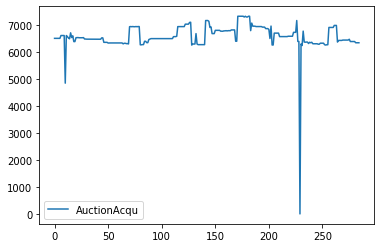

In [129]:
fig=plt.figure()
line1=plt.plot(range(0,285),subdf2['MMRAcquisitionAuctionAveragePrice'], label='AuctionAcqu')
#line1=plt.plot(range(0,285),subdf2['MMRAcquisitionRetailAveragePrice'], label='RetAcqu')
#line1=plt.plot(range(0,285),subdf2['MMRCurrentAuctionAveragePrice'], label='AuctionCurr')
#line1=plt.plot(range(0,285),subdf2['MMRCurrentRetailAveragePrice'], label='RetCurr')
plt.legend()

In [21]:
subdf2.corr()

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice
MMRAcquisitionAuctionAveragePrice,1.000000,0.968686,0.521215,0.458569,0.061987,0.012196,0.072245,-0.000431
MMRAcquisitionAuctionCleanPrice,0.968686,1.000000,0.608404,0.562479,0.031653,0.065089,0.090191,0.078354
MMRAcquisitionRetailAveragePrice,0.521215,0.608404,1.000000,0.986785,0.118312,0.217147,0.088656,0.106485
MMRAcquisitonRetailCleanPrice,0.458569,0.562479,0.986785,1.000000,0.120769,0.244602,0.096979,0.137550
MMRCurrentAuctionAveragePrice,0.061987,0.031653,0.118312,0.120769,1.000000,0.887468,0.555075,0.339187
MMRCurrentAuctionCleanPrice,0.012196,0.065089,0.217147,0.244602,0.887468,1.000000,0.594688,0.556714
MMRCurrentRetailAveragePrice,0.072245,0.090191,0.088656,0.096979,0.555075,0.594688,1.000000,0.872858
MMRCurrentRetailCleanPrice,-0.000431,0.078354,0.106485,0.137550,0.339187,0.556714,0.872858,1.000000


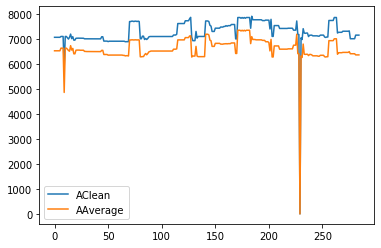

In [22]:
fig=plt.figure()
line1=plt.plot(range(0,285),subdf2['MMRAcquisitionAuctionCleanPrice'], label='AClean')
line1=plt.plot(range(0,285),subdf2['MMRAcquisitionAuctionAveragePrice'], label='AAverage')
plt.legend()

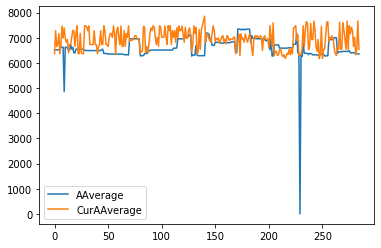

In [23]:
fig=plt.figure()
line1=plt.plot(range(0,285),subdf2['MMRAcquisitionAuctionAveragePrice'], label='AAverage')
line1=plt.plot(range(0,285),subdf2['MMRCurrentAuctionAveragePrice'], label='CurAAverage')
plt.legend()

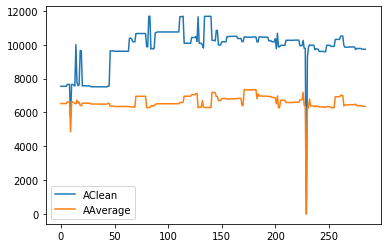

In [24]:
fig=plt.figure()
line1=plt.plot(range(0,285),subdf2['MMRAcquisitionRetailAveragePrice'], label='AClean')
line1=plt.plot(range(0,285),subdf2['MMRAcquisitionAuctionAveragePrice'], label='AAverage')
plt.legend()

In [25]:
df.corr()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
RefId,1.000000,0.026249,0.012306,-0.027387,0.013970,-0.024775,-0.010061,-0.014251,-0.030702,-0.032965,-0.006934,-0.011416,-0.020314,-0.023234,0.035519,0.135599,-0.011589,-0.047771,-0.024420
IsBadBuy,0.026249,1.000000,-0.156926,0.165325,-0.047693,0.082858,-0.105793,-0.099315,-0.084514,-0.080712,-0.106130,-0.101036,-0.100786,-0.097195,-0.059412,0.006393,-0.098132,-0.003969,0.050259
VehYear,0.012306,-0.156926,1.000000,-0.958049,0.261366,-0.283569,0.582416,0.533807,0.582414,0.540206,0.591968,0.549345,0.599415,0.559579,0.281799,0.069976,0.349672,0.057316,-0.267739
VehicleAge,-0.027387,0.165325,-0.958049,1.000000,-0.252018,0.318778,-0.567106,-0.519897,-0.462299,-0.427526,-0.576914,-0.533646,-0.505322,-0.470640,-0.269907,-0.076617,-0.311903,-0.024659,0.257996
WheelTypeID,0.013970,-0.047693,0.261366,-0.252018,1.000000,-0.212432,-0.094658,-0.129608,-0.071736,-0.101796,-0.086798,-0.120046,-0.072684,-0.101250,0.189817,0.007846,-0.160986,-0.011364,-0.133688
VehOdo,-0.024775,0.082858,-0.283569,0.318778,-0.212432,1.000000,-0.018381,0.023717,0.029107,0.061407,-0.030141,0.010755,0.013719,0.046070,-0.292230,-0.053547,-0.064436,0.030994,0.411273
MMRAcquisitionAuctionAveragePrice,-0.010061,-0.105793,0.582416,-0.567106,-0.094658,-0.018381,1.000000,0.990218,0.910185,0.909832,0.937482,0.931919,0.871220,0.870424,0.108806,0.047112,0.789354,0.038029,-0.049682
MMRAcquisitionAuctionCleanPrice,-0.014251,-0.099315,0.533807,-0.519897,-0.129608,0.023717,0.990218,1.000000,0.902339,0.917934,0.923144,0.931599,0.860055,0.870604,0.062818,0.041810,0.781123,0.037896,-0.019607
MMRAcquisitionRetailAveragePrice,-0.030702,-0.084514,0.582414,-0.462299,-0.071736,0.029107,0.910185,0.902339,1.000000,0.990085,0.851330,0.848776,0.912747,0.905523,0.107988,0.036402,0.745718,0.079767,-0.053507
MMRAcquisitonRetailCleanPrice,-0.032965,-0.080712,0.540206,-0.427526,-0.101796,0.061407,0.909832,0.917934,0.990085,1.000000,0.846393,0.854986,0.902680,0.906231,0.069857,0.032120,0.744622,0.076735,-0.026708


In [26]:
df['BYRNO'].value_counts()

99761    3191
18880    2852
835      2398
3453     2362
22916    2285
         ... 
10420       3
1157        1
10425       1
99741       1
1086        1
Name: BYRNO, Length: 72, dtype: int64

In [66]:
subdf3=df.loc[df['Model']=='CALIBER',:]
subdf3['SubModel'].value_counts()

4D WAGON            884
4D WAGON SXT        203
4D WAGON SE          16
4D WAGON R/T AWD      3
4D WAGON R/T          2
Name: SubModel, dtype: int64

In [67]:
subdf3=subdf3.loc[subdf3['SubModel']=='4D WAGON',:]
subdf3['Trim'].value_counts()

SE     754
Bas    130
Name: Trim, dtype: int64

In [68]:
subdf3=subdf3.loc[subdf3['Trim']=='SE',:]
subdf3['VehYear'].value_counts()

2008    754
Name: VehYear, dtype: int64

In [69]:
subdf3['PurchDate'] =pd.to_datetime(subdf3['PurchDate'])
subdf3=subdf3.sort_values('PurchDate')
subdf3

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
26844,53706,0,2009-02-11,OTHER,2008,1,DODGE,CALIBER,SE,4D WAGON,...,7911.0,8426.0,NaN,NaN,99761,74135,OK,6600.0,0,754
52951,53677,0,2009-02-11,OTHER,2008,1,DODGE,CALIBER,SE,4D WAGON,...,10921.0,11542.0,NaN,NaN,99761,74135,OK,6600.0,0,754
49722,53718,0,2009-02-11,OTHER,2008,1,DODGE,CALIBER,SE,4D WAGON,...,7911.0,8426.0,NaN,NaN,99761,74135,OK,6600.0,0,754
49635,53713,0,2009-02-11,OTHER,2008,1,DODGE,CALIBER,SE,4D WAGON,...,11237.0,11739.0,NaN,NaN,99761,74135,OK,6600.0,0,754
53383,53728,0,2009-02-11,OTHER,2008,1,DODGE,CALIBER,SE,4D WAGON,...,10834.0,11413.0,NaN,NaN,99761,74135,OK,6600.0,0,754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55082,55255,0,2010-12-03,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,...,11509.0,12387.0,NaN,NaN,99761,74135,OK,7450.0,0,693
55362,55232,0,2010-12-03,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,...,11691.0,12701.0,NaN,NaN,99761,74135,OK,7450.0,0,693
1217,55252,0,2010-12-03,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,...,11270.0,11713.0,NaN,NaN,99761,74135,OK,7450.0,0,693
46772,55238,0,2010-12-03,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,...,11321.0,11966.0,NaN,NaN,99761,74135,OK,7450.0,0,693


In [128]:
tmp=subdf3.loc[subdf3['PurchDate']=='2009-02-11']
tmp=tmp.loc[:,['PurchDate','Color','Transmission','WheelType','VehOdo','MMRAcquisitionAuctionAveragePrice','MMRCurrentAuctionAveragePrice']]
tmp['Color'].value_counts()
tmp=tmp.loc[tmp['Color']=='RED']
tmp

,PurchDate,Color,Transmission,WheelType,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRCurrentAuctionAveragePrice
52951,2009-02-11,RED,AUTO,Covers,51026,6948.0,6967.0
53383,2009-02-11,RED,AUTO,Covers,50268,6948.0,7269.0
55054,2009-02-11,RED,AUTO,Alloy,50672,6948.0,6966.0
39550,2009-02-11,RED,AUTO,Covers,50132,6948.0,6966.0
39272,2009-02-11,RED,AUTO,Covers,50733,6948.0,6966.0
35377,2009-02-11,RED,AUTO,Covers,51274,6948.0,7524.0
57334,2009-02-11,RED,AUTO,Covers,47405,6948.0,6966.0


In [117]:
df.loc[[35377,39272],]

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
35377,53734,0,2009-02-11,OTHER,2008,1,DODGE,CALIBER,SE,4D WAGON,...,10564.0,11431.0,NaN,NaN,99761,74135,OK,6600.0,0,754
39272,53687,0,2009-02-11,OTHER,2008,1,DODGE,CALIBER,SE,4D WAGON,...,11237.0,11739.0,NaN,NaN,99761,74135,OK,6600.0,0,754


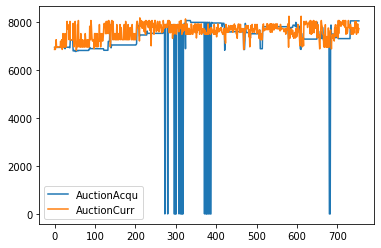

In [31]:
subdf3=subdf3[['PurchDate',
            'MMRAcquisitionAuctionAveragePrice',
            'MMRAcquisitionAuctionCleanPrice',
            'MMRAcquisitionRetailAveragePrice',
             'MMRAcquisitonRetailCleanPrice',
            'MMRCurrentAuctionAveragePrice',     
            'MMRCurrentAuctionCleanPrice', 
            'MMRCurrentRetailAveragePrice',    
            'MMRCurrentRetailCleanPrice']]


fig=plt.figure()
line1=plt.plot(range(0,754),subdf3['MMRAcquisitionAuctionAveragePrice'], label='AuctionAcqu')
line1=plt.plot(range(0,754),subdf3['MMRCurrentAuctionAveragePrice'], label='AuctionCurr')
plt.legend()

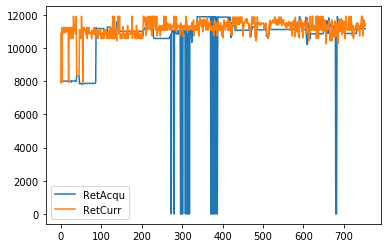

In [32]:
fig=plt.figure()
line1=plt.plot(range(0,754),subdf3['MMRAcquisitionRetailAveragePrice'], label='RetAcqu')
line1=plt.plot(range(0,754),subdf3['MMRCurrentRetailAveragePrice'], label='RetCurr')
plt.legend()

In [33]:
subdf3.corr()

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice
MMRAcquisitionAuctionAveragePrice,1.000000,0.994681,0.918942,0.921850,0.093599,0.156613,0.109015,0.146117
MMRAcquisitionAuctionCleanPrice,0.994681,1.000000,0.922193,0.931830,0.090883,0.169283,0.100342,0.145860
MMRAcquisitionRetailAveragePrice,0.918942,0.922193,1.000000,0.996845,0.181898,0.281991,0.164710,0.228061
MMRAcquisitonRetailCleanPrice,0.921850,0.931830,0.996845,1.000000,0.176318,0.282121,0.154817,0.220706
MMRCurrentAuctionAveragePrice,0.093599,0.090883,0.181898,0.176318,1.000000,0.837130,0.551014,0.490166
MMRCurrentAuctionCleanPrice,0.156613,0.169283,0.281991,0.282121,0.837130,1.000000,0.543521,0.679025
MMRCurrentRetailAveragePrice,0.109015,0.100342,0.164710,0.154817,0.551014,0.543521,1.000000,0.922984
MMRCurrentRetailCleanPrice,0.146117,0.145860,0.228061,0.220706,0.490166,0.679025,0.922984,1.000000


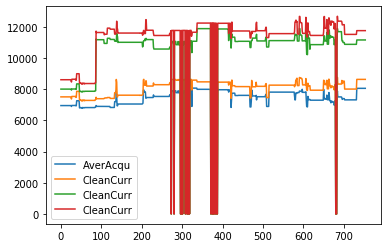

In [34]:
fig=plt.figure()
line1=plt.plot(range(0,754),subdf3['MMRAcquisitionAuctionAveragePrice'], label='AverAcqu')
line1=plt.plot(range(0,754),subdf3['MMRAcquisitionAuctionCleanPrice'], label='CleanCurr')
line1=plt.plot(range(0,754),subdf3['MMRAcquisitionRetailAveragePrice'], label='CleanCurr')
line1=plt.plot(range(0,754),subdf3['MMRAcquisitonRetailCleanPrice'], label='CleanCurr')
plt.legend()

In [47]:
subdf4=df.loc[df['Model']=='IMPALA',:]
subdf4['SubModel'].value_counts()
subdf4=subdf4.loc[subdf4['SubModel']=='4D SEDAN LS',:]
subdf4['Trim'].value_counts()
subdf4=subdf4.loc[subdf4['Trim']=='LS',:]
subdf4['VehYear'].value_counts()
subdf4=subdf4.loc[subdf4['VehYear']==2007,:]
subdf4['PurchDate'] =pd.to_datetime(subdf4['PurchDate'])
subdf4=subdf4.sort_values('PurchDate')

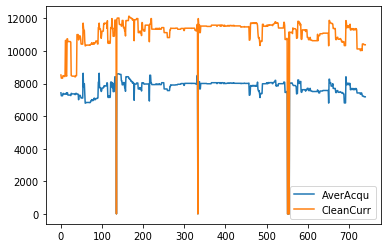

In [39]:
fig=plt.figure()
line1=plt.plot(range(0,741),subdf4['MMRAcquisitionAuctionAveragePrice'], label='AAP')
#line1=plt.plot(range(0,741),subdf3['MMRAcquisitionAuctionCleanPrice'], label='CleanCurr')
line1=plt.plot(range(0,741),subdf4['MMRAcquisitionRetailAveragePrice'], label='RAP')
#line1=plt.plot(range(0,741),subdf3['MMRAcquisitonRetailCleanPrice'], label='CleanCurr')
plt.legend()

In [49]:
subdf4=subdf4[['PurchDate',
            'MMRAcquisitionAuctionAveragePrice',
            'MMRAcquisitionAuctionCleanPrice',
            'MMRAcquisitionRetailAveragePrice',
            'MMRAcquisitonRetailCleanPrice',
            'MMRCurrentAuctionAveragePrice',     
            'MMRCurrentAuctionCleanPrice', 
            'MMRCurrentRetailAveragePrice',    
            'MMRCurrentRetailCleanPrice']]
subdf4.corr()

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice
MMRAcquisitionAuctionAveragePrice,1.000000,0.992913,0.921652,0.919396,0.137241,0.105533,0.153686,0.106755
MMRAcquisitionAuctionCleanPrice,0.992913,1.000000,0.913435,0.921083,0.108449,0.086733,0.124689,0.086979
MMRAcquisitionRetailAveragePrice,0.921652,0.913435,1.000000,0.991370,0.146549,0.113137,0.164795,0.108739
MMRAcquisitonRetailCleanPrice,0.919396,0.921083,0.991370,1.000000,0.141584,0.117087,0.162077,0.115426
MMRCurrentAuctionAveragePrice,0.137241,0.108449,0.146549,0.141584,1.000000,0.982078,0.914315,0.923857
MMRCurrentAuctionCleanPrice,0.105533,0.086733,0.113137,0.117087,0.982078,1.000000,0.884543,0.927163
MMRCurrentRetailAveragePrice,0.153686,0.124689,0.164795,0.162077,0.914315,0.884543,1.000000,0.960618
MMRCurrentRetailCleanPrice,0.106755,0.086979,0.108739,0.115426,0.923857,0.927163,0.960618,1.000000


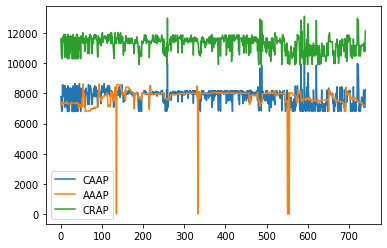

In [52]:
fig=plt.figure()
line1=plt.plot(range(0,741),subdf4['MMRCurrentAuctionAveragePrice'], label='CAAP')
line1=plt.plot(range(0,741),subdf4['MMRAcquisitionAuctionAveragePrice'], label='AAAP')
line1=plt.plot(range(0,741),subdf4['MMRCurrentRetailAveragePrice'], label='CRAP')
#line1=plt.plot(range(0,741),subdf3['MMRAcquisitonRetailCleanPrice'], label='CleanCurr')
plt.legend()

In [54]:
df.to_csv(path_or_buf=r'C:\Users\Michele\Documents\unipi\DM\progetto\DataUnderstanding\Python\data.csv', index=False)